# Programación genética

In [9]:
!pip3 install gplearn
# !pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

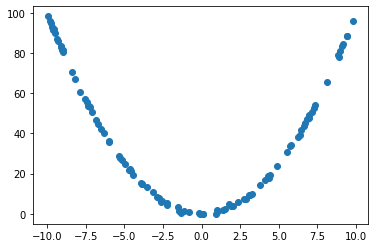

In [11]:
# Training samples
X_train = np.random.uniform(-10,10,100).reshape(-1,1)
y_train = X_train**2 + 0.5*np.random.randn(100).reshape(-1,1)

# y_train = X_train**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='tab:blue')
plt.show()

In [12]:


y_train = y_train.reshape(100,)



In [ ]:


est_gp = SymbolicRegressor(population_size=500,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


In [ ]:


print(est_gp._program)



In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph